In [1]:
import sys, os
import numpy as np
import h5py
# from cil.io import TIFFSTackWriter, TIFFStackReader
import cil

from pathlib import Path
import matplotlib.pyplot as plt
import tigre
import scipy.ndimage as nd
from PIL import Image
import os
from pathlib import Path
import preprocessing as pre

%reload_ext autoreload
%autoreload 2

In [2]:
geo = tigre.geometry_default()
print(geo)

TIGRE parameters
-----
Geometry parameters
Distance from source to detector (DSD) = 1536.0 mm
Distance from source to origin (DSO)= 1000.0 mm
-----
Detector parameters
Number of pixels (nDetector) = [512 512]
Size of each pixel (dDetector) = [0.8 0.8] mm
Total size of the detector (sDetector) = [409.6 409.6] mm
-----
Image parameters
Number of voxels (nVoxel) = [512 512 512]
Total size of the image (sVoxel) = [256 256 256] mm
Size of each voxel (dVoxel) = [0.5 0.5 0.5] mm
-----
Offset correction parameters
Offset of image from origin (offOrigin) = [0 0 0] mm
Offset of detector (offDetector) = [0 0] mm
-----
Auxillary parameters
Samples per pixel of forward projection (accuracy) = 0.5


In [3]:
golden_geometry = tigre.geometry(mode="cone", default=True)

golden_geometry.DSD = 1350  # Distance Source Detector (mm)
golden_geometry.DSO = 930  # Distance Source Origin (mm)

golden_geometry.nDetector = np.array([2048, 2048])  # number of pixels (px)
golden_geometry.dDetector = np.array([0.2, 0.2])  # size of each pixel (mm)
golden_geometry.sDetector = (
    golden_geometry.dDetector * golden_geometry.nDetector
)  # total size of the detector (mm)

golden_geometry.nVoxel = np.repeat(golden_geometry.nDetector[0], 3)  # number of voxels
golden_geometry.dVoxel = np.repeat(
    golden_geometry.dDetector[0], 3
)  # size of each voxel
golden_geometry.sVoxel = (
    golden_geometry.dVoxel * golden_geometry.nVoxel
)  # total size of the image

golden_geometry.offOrigin = np.array([0, 0, 0])  # Offset of image from origin (mm)
golden_geometry.offDetector = np.array([0, 0])  # Offset of Detector

golden_geometry.accuracy = 0.5  # Accuracy of FWD proj    (vx/sample)

golden_geometry.COR = 0

golden_geometry.rotDetector = np.array([270/180 * np.pi, 0, 0])  # Rotation of detector

In [28]:
root = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Data sets\GoldenPreTest"
o_root = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Data sets\ProcessedProjections"
exp_name = "test_timeglass_130223_GoldenAngle-radio_"
number_of_projections = 100
geometry = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Data sets\GoldenPreTest\defective_pixels.defect" #golden_geometry
metallic_mean_n = 1
rotation = 270

In [29]:
eq_golden_projections = pre.ProjectionsEQNR(
    root,
    exp_name,
    o_root,
    number_of_projections,
    correction_parent=root,
    geometry=None,
    metallic_mean_n=metallic_mean_n,
    rotation=rotation,
    roi=(1024, 1024),
)

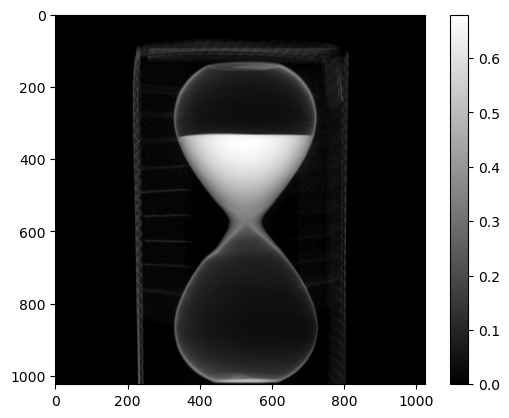

In [15]:
# eq_golden_projections()

In [267]:
with open(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Data sets\GoldenPreTest\defective_pixels.defect", "r") as f:
    defective_pixels = f.readlines()[6:-2]
    # print(defective_pixels)

import pandas as pd

panda = pd.read_csv(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Data sets\GoldenPreTest\defective_pixels.defect", skiprows=6, skipfooter=2, engine="python", dtype = int, sep=" ")

# print(panda)

panda_arr = np.array(panda)
print(panda_arr)
print(panda_arr.shape)

[[1062   11    1]
 [ 601   12    1]
 [ 602   12    1]
 ...
 [ 707 2032    1]
 [ 707 2034    1]
 [ 707 2036    1]]
(7518, 3)


In [30]:
im0 = eq_golden_projections.load_tif(eq_golden_projections.p_roots[0])
im0 = eq_golden_projections.rotate_projection(im0)

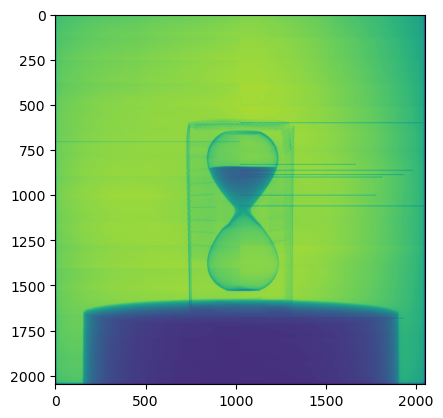

In [31]:
plt.imshow(im0)

100


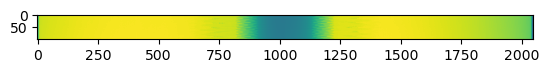

In [34]:
centre_slice = np.zeros(
            (
                len(eq_golden_projections.angles),
                1,
                im0.shape[-1],
            )
        )
for i, p_root in enumerate(eq_golden_projections.p_roots):
    centre_slice[i,:,:] = eq_golden_projections.rotate_projection(eq_golden_projections.load_tif(p_root))[im0.shape[0] // 2 -100, :]

print(len(eq_golden_projections.angles))
plt.imshow(centre_slice[:,0,:])
plt.show()
